In [100]:
import pandas as pd
import numpy as np

### Background and theory

This notebook will implement a simple neural network (NN) in python. The NN will have a single hidden layer with a hyperbolic tangent as the activation function,

&nbsp;&nbsp;&nbsp;&nbsp; $tanh(z) = \frac{\exp(z) - \exp(-z)}{\exp(z) + \exp(-z)}$,

and an output layer described by the sigmoid function,

&nbsp;&nbsp;&nbsp;&nbsp; $\sigma(z) = \frac{1}{1+\exp(-z)}$.

For this notebook, the size of the hidden layer will be a tunable hyper parameter. As an example, we show below the basic structure of a NN with a hidden layer of size 3, as well as the underlying matrix algebra. For the sake of implicity, the model below shows only two features per training example, in reality there are more.

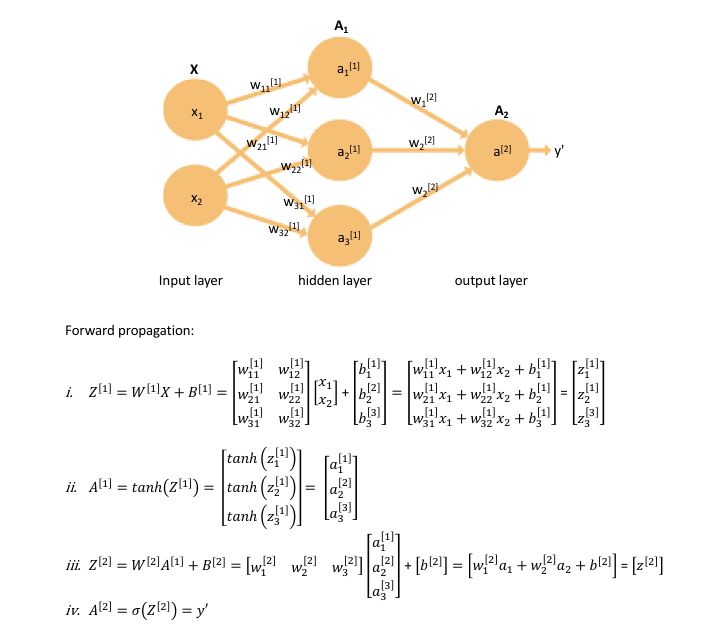

In [2]:
Image(filename='nn_structure.png') 

### Defining the structure

The first step will be to define the structure of the neural network.

In [8]:
def structure(X, Y, size):
    n_x = X.shape[0] #Number of features per training example
    n_y = Y.shape[0] #Size of the outpit layer
    n_h = size #Size of the hidden layer
    return n_x, n_y, n_h

### Initialize the parameters

Based on the structure function defined above, we can randomly initialize the parameters of the model. We need to initialize the coefficieents for the hidden ($W1$, $b1$) and output ($W2$, $b2$)) layers. 

In [12]:
def initialize(n_x, n_y, n_h):
    W1 = np.random.rand(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.rand(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### Activation functions

The next step is to define the activation functions, recall $z = wX +b$.

In [13]:
def tanh(z):
    return np.tanh(z)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

### Forward propagation

In the forward propagation step, all of the algebraic step described in the figure above are evaluated. First the tanh function is evaluated for the hidden layer using the coefficients $w^{[1]}$, and the output of this, $A^{[1]}$, is used as input top the sigmoid function in the output layer.

In [14]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    _all = { 'Z1' : Z1,
             'A1' : A1,
             'Z2' : Z2,
             'A2' : A2,
    }
    return A2, _all

### Cost function

After forward propagation, the cost is computed for the purpose of gradient descent. We will use the following cost function:

&nbsp;&nbsp;&nbsp;&nbsp; $$j = - \large{(} \small y\log\left(y'\right) + (1-y)\log\left(1-y'\right) \large{)} \small\tag{13},$$

where $y$ and $y'$ represent the actual and predicted labels on the training data.

Since we consider many training examples, we consider the total cost to be the mean of the cost function for each training example,

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(y'^{(i)}\right) + (1-y^{(i)})\log\left(1- y'^{(i)}\right) \large{)} \small\tag{13},$$

where we have introduced the notation that $y^{(i)}$ represents the label of the i'th training example.

In [15]:
def calculate_cost(A2, Y):
    m = Y.shape[1] # number of example
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y)
    cost = - np.sum(logprobs)/m
    return cost

### Back propagation

Once the cost has been computed, we can implement gradient descent for back propagation. To do this, the relevant gradients are computed.

In [16]:
def backward_propagation(parameters, cache, X, Y):
    #Required parameters
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']

    #Calculate the gradients
    dZ2 = A2-Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)/m
    dZ1 = np.dot(W2.T, dZ2)*(1-A1**2)
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis = 1, keepdims = True)/m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

### Update the coefficients

In gradient descent, the coefficients are updated according to the gradients and the learning rate,

&nbsp;&nbsp;&nbsp;&nbsp; $\omega \rightarrow \omega - \gamma \frac{\delta J}{\delta \omega}$,

where $\omega$ is an arbitrary coefficient, $J$ is the loss, and $\gamma$ is the learning rate.

In [17]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    #parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    #Get the gradients
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    #Update the coefficients
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    #New parameters
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### Neural network

With all the functionality defined above, the final step is to implement a neural network.

In [69]:
def neural_network(X, Y, n_h, num_epochs = 10000, print_output = True):
    
    #Neural network structure
    n_x, n_y, n_h = structure(X, Y, n_h)
    
    # Initialize parameters
    parameters = initialize(n_x, n_y, n_h)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)

    for epoch in range(0, num_epochs):
         
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)
        
        # Compute the cost
        cost = calculate_cost(A2, Y)
 
        # Backpropagation
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update
        parameters = update_parameters(parameters, grads)

        # Print the cost every 1000 iterations
        if print_output and epoch % 100 == 0:
            print ("Cost after iteration %i: %f" %(epoch, cost))

    return parameters

### Prediction function

Once there is a trained neural network, the final component is a function that can make predictions based on forward propagation.

In [63]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.where(A2 > 0.5, 1, 0)
    return predictions

### Load the data

To test the accuracy of the predictions, we can load some example data and check the performance of the neural network. Below i use the well known Pima Indians data set.

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [50]:
df = pd.read_csv('pima-indians-diabetes.data.txt', header = None)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

X_train = X_train.as_matrix().T
X_test = X_test.as_matrix().T
y_train = np.array(y_train).reshape(1, -1)
y_test = np.array(y_test).reshape(1, -1)

### Train the model

With the data now loaded and shaped correctly, we can train a model.

In [79]:
nn = neural_network(X_train, y_train, 3, 2000)

Cost after iteration 0: 0.693179
Cost after iteration 100: 0.546055
Cost after iteration 200: 0.505682
Cost after iteration 300: 0.475951
Cost after iteration 400: 0.466395
Cost after iteration 500: 0.460671
Cost after iteration 600: 0.456287
Cost after iteration 700: 0.452429
Cost after iteration 800: 0.448576
Cost after iteration 900: 0.445016
Cost after iteration 1000: 0.441835
Cost after iteration 1100: 0.439176
Cost after iteration 1200: 0.436932
Cost after iteration 1300: 0.434939
Cost after iteration 1400: 0.433063
Cost after iteration 1500: 0.431252
Cost after iteration 1600: 0.429505
Cost after iteration 1700: 0.427831
Cost after iteration 1800: 0.426270
Cost after iteration 1900: 0.424868


We can see that the gradient descent has converged.

### Make some predictions and assess

In [80]:
from sklearn.metrics import accuracy_score, f1_score

In [98]:
predictions = predict(nn, X_test)
print('accuracy_score: {}'.format(accuracy_score(list(predictions[0]), list(y_test[0]))))
print('f1_score: {}'.format(f1_score(list(predictions[0]), list(y_test[0]))))

accuracy_score: 0.7552083333333334
f1_score: 0.6299212598425197


### Optimize the size of the hidden layer

In [99]:
f1 = []
size = []
for n in range(1, 30):
    nn = neural_network(X_train, y_train, n, 2000, print_output = False)
    predictions = predict(nn, X_test)
    f1.append(f1_score(list(predictions[0]), list(y_test[0])))
    size.append(n)
    
print('best f1: {}'.format(max(f1)))

best f1: 0.6865671641791045


### Conclusion

A simple neural network with a single hidden layer has been successfully trained. The simple model performed reasonably well on the Pima Indians data set with an f1 score of 0.69.